Grid shape: (24, 360)
Bx: -16.05
By: -34.42
Bz: 10.34
Vsw: -700.5


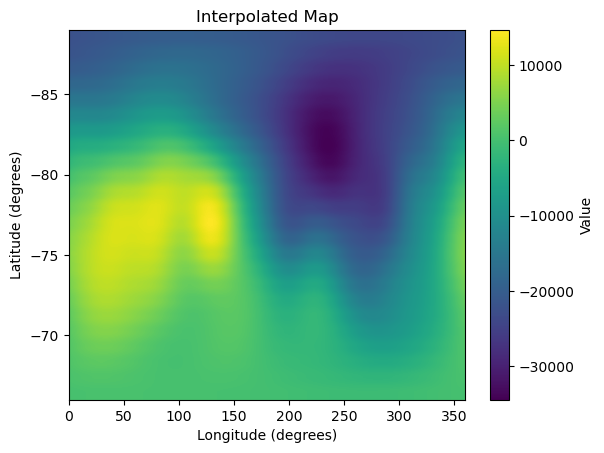

/tmp/ipykernel_5526/654174196.py:74: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  c = ax.pcolormesh(theta_grid, r_grid, grid_values, shading='auto', cmap='plasma')


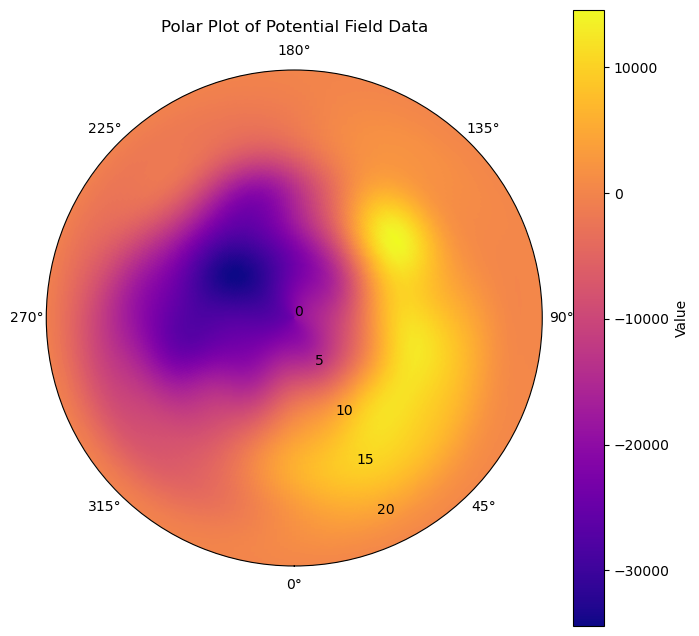

In [13]:
#Testing stuff 

import os
import numpy as np
import pickle

npy_path = "/home/simone/Downloads/pickled_maps/"
npy_file = "map_2024_5_11_5_0_0.npy"
npy_path = os.path.join(npy_path, npy_file)

# Latitude and longitude settings
lat_start, lat_end, lat_step = -66, -89, -1
lon_step = 2  # Original step

with open(npy_path, "rb") as f:
    data = pickle.load(f)
    grid_2d = data[0]
    bx, by, bz, vsw = data[1], data[2], data[3], data[4]
    print("Grid shape:", grid_2d.shape)
    print("Bx:", bx)
    print("By:", by)
    print("Bz:", bz)
    print("Vsw:", vsw)

import matplotlib.pyplot as plt

plt.imshow(grid_2d, aspect='auto', extent=[0, 360, lat_start, lat_end], origin='lower')
plt.colorbar(label='Value')
plt.title('Interpolated Map')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.show()


#=== LAT/LON GRID ===
n_lat, n_lon = grid_2d.shape
latitudes = np.linspace(-66, -89, n_lat)
longitudes = np.linspace(0, 360, n_lon, endpoint=False)

#Convert to polar coordinates
mag_lon_deg = longitudes
mag_lat_deg = latitudes[:, None]  # shape (n_lat, 1), broadcastable

theta = np.deg2rad(mag_lon_deg)           # shape (n_lon,)
r = 89 - np.abs(mag_lat_deg)              # shape (n_lat, 1) #take care to the 89 for visualization

#Create 2D meshgrid for plotting
#theta_grid, r_grid = np.meshgrid(theta, r)
# Optional: create a grid if data is regular

from scipy.interpolate import griddata

# Create polar grid
r_i = np.linspace(r.min(), r.max(), 200)
theta_i = np.linspace(0, 2 * np.pi, 360)
r_grid, theta_grid = np.meshgrid(r_i, theta_i)

# Flatten r and repeat it to match the size of theta
r_flat = np.repeat(r.flatten(), theta.size)

# Tile theta to match the size of r
theta_tiled = np.tile(theta, r.size)

# Combine r and theta into points
points = np.column_stack((r_flat, theta_tiled))

# Interpolate values onto grid
grid_values = griddata(points, grid_2d.flatten(), (r_grid, theta_grid), method='linear')

#=== PLOT ===
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

c = ax.pcolormesh(theta_grid, r_grid, grid_values, shading='auto', cmap='plasma')

ax.set_theta_zero_location("S")  # 0° at the bottom
ax.set_theta_direction(1)       # Clockwise
ax.set_title("Polar Plot of Potential Field Data", va='bottom')
plt.colorbar(c, label="Value")

plt.show()



<>:21: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_5526/2664220313.py:21: SyntaxWarning: invalid escape sequence '\c'
  plt.yticks([0,10,20], ['-90$^{\circ}$', '-80$^{\circ}$', '-70$^{\circ}$'], fontsize = 16)
/tmp/ipykernel_5526/2664220313.py:21: SyntaxWarning: invalid escape sequence '\c'
  plt.yticks([0,10,20], ['-90$^{\circ}$', '-80$^{\circ}$', '-70$^{\circ}$'], fontsize = 16)
/tmp/ipykernel_5526/2664220313.py:21: SyntaxWarning: invalid escape sequence '\c'
  plt.yticks([0,10,20], ['-90$^{\circ}$', '-80$^{\circ}$', '-70$^{\circ}$'], fontsize = 16)
/tmp/ipykernel_5526/2664220313.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor 

23.0


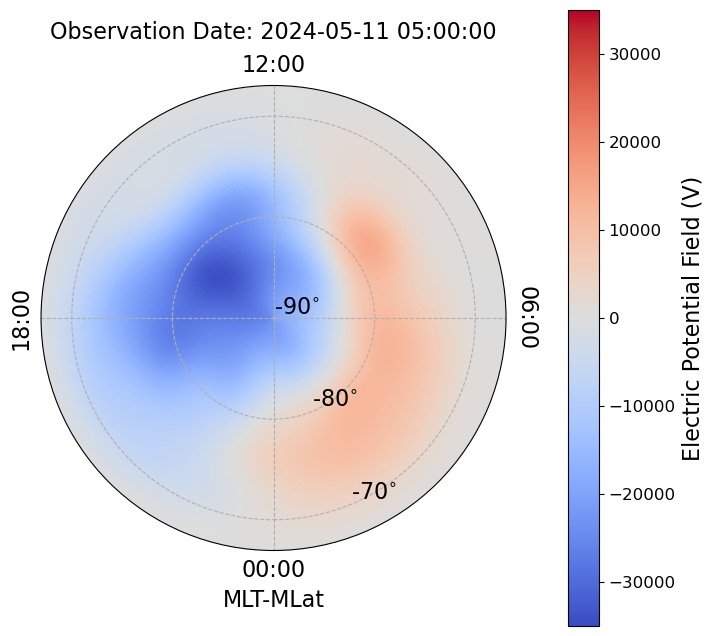

In [37]:
#=== PLOT ===

print(np.max(r_i))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

c = ax.pcolormesh(theta_grid, r_grid, grid_values, shading='auto', cmap='coolwarm', vmin=-35000, vmax=35000)

# Add grid in the background
ax.grid(True, linestyle='--')

# Update title to include the date of observation
observation_date = "2024-05-11 05:00:00"  # Extracted from the filename
ax.set_title(f"Observation Date: {observation_date}", va='bottom', fontsize=16, pad=30)

text_radius = 25
axis_raidus = 28


plt.yticks([0,10,20], ['-90$^{\circ}$', '-80$^{\circ}$', '-70$^{\circ}$'], fontsize = 16)
plt.xticks(np.radians([0, 90, 180, 270]), ['', '', '', ''], fontsize = 16)
plt.text(np.radians(0), text_radius, '00:00', ha = 'center', va = 'center', fontsize = 16)
plt.text(np.radians(90), text_radius, '06:00', ha = 'center', va = 'center', rotation = 270, fontsize = 16)
plt.text(np.radians(180),text_radius, '12:00', ha = 'center', va = 'center', fontsize = 16)
plt.text(np.radians(270), text_radius, '18:00', ha = 'center', va = 'center', rotation = 90, fontsize = 16)
plt.text(np.radians(0), axis_raidus , 'MLT-MLat', ha = 'center', va = 'center', fontsize = 16)

ax.set_theta_zero_location("S")  # 0° at the bottom
ax.set_theta_direction(1)       # Clockwise

# Adjust colorbar
cbar = plt.colorbar(c, ax=ax, pad=0.1, label="Value")
cbar.ax.tick_params(labelsize=12)
cbar.set_label("Electric Potential Field (V)", fontsize=16)

plt.show()


<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_5526/3700738109.py:26: SyntaxWarning: invalid escape sequence '\c'
  plt.yticks([0,10,20], ['-90$^{\circ}$', '-80$^{\circ}$', '-70$^{\circ}$'], fontsize = 16)
/tmp/ipykernel_5526/3700738109.py:26: SyntaxWarning: invalid escape sequence '\c'
  plt.yticks([0,10,20], ['-90$^{\circ}$', '-80$^{\circ}$', '-70$^{\circ}$'], fontsize = 16)
/tmp/ipykernel_5526/3700738109.py:26: SyntaxWarning: invalid escape sequence '\c'
  plt.yticks([0,10,20], ['-90$^{\circ}$', '-80$^{\circ}$', '-70$^{\circ}$'], fontsize = 16)
/tmp/ipykernel_5526/3700738109.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor 

23.0


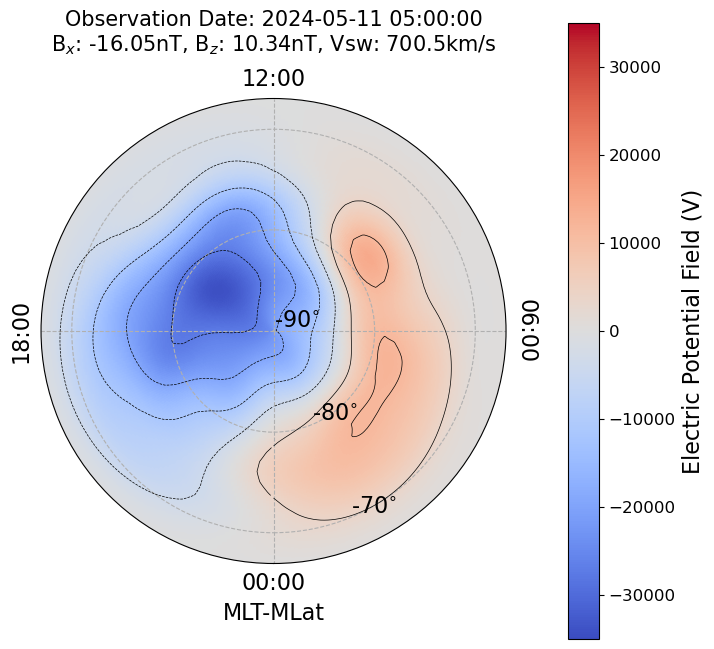

In [42]:
#=== PLOT WITH CONTOURS ===

print(np.max(r_i))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# Plot the data as a color mesh
c = ax.pcolormesh(theta_grid, r_grid, grid_values, shading='auto', cmap='coolwarm', vmin=-35000, vmax=35000)

# Add contours to the plot
contour_levels = np.linspace(-35000, 35000, 10)  # Define contour levels
contours = ax.contour(theta_grid, r_grid, grid_values, levels=contour_levels, colors='black', linewidths=0.5)

# Add grid in the background
ax.grid(True, linestyle='--')

# Update title to include the date of observation and unused conditions
observation_date = "2024-05-11 05:00:00"  # Extracted from the filename
ax.set_title(f"Observation Date: {observation_date}\nB$_x$: {bx}nT, B$_z$: {bz}nT, Vsw: {np.abs(vsw)}km/s", 
             va='bottom', fontsize=15, pad=30)

text_radius = 25
axis_raidus = 28

plt.yticks([0,10,20], ['-90$^{\circ}$', '-80$^{\circ}$', '-70$^{\circ}$'], fontsize = 16)
plt.xticks(np.radians([0, 90, 180, 270]), ['', '', '', ''], fontsize = 16)
plt.text(np.radians(0), text_radius, '00:00', ha = 'center', va = 'center', fontsize = 16)
plt.text(np.radians(90), text_radius, '06:00', ha = 'center', va = 'center', rotation = 270, fontsize = 16)
plt.text(np.radians(180),text_radius, '12:00', ha = 'center', va = 'center', fontsize = 16)
plt.text(np.radians(270), text_radius, '18:00', ha = 'center', va = 'center', rotation = 90, fontsize = 16)
plt.text(np.radians(0), axis_raidus , 'MLT-MLat', ha = 'center', va = 'center', fontsize = 16)

ax.set_theta_zero_location("S")  # 0° at the bottom
ax.set_theta_direction(1)       # Clockwise

# Adjust colorbar
cbar = plt.colorbar(c, ax=ax, pad=0.1, label="Value")
cbar.ax.tick_params(labelsize=12)
cbar.set_label("Electric Potential Field (V)", fontsize=16)

#save the fig as a pdf
fig.savefig("polar_plot_with_contours.pdf", format='pdf', dpi=300, bbox_inches='tight')

plt.show()